# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Picart, David Kyle\
_Student No._: 2022-01148\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: Oct. 6, 2024. 4:38 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** David Kyle R. Picart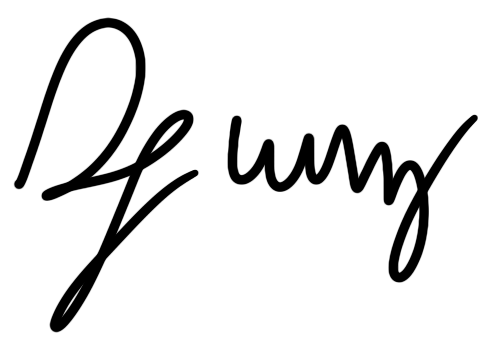

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [ ]:
import numpy as np

A = np.array([[8,-2,-20], [-2,-3,-9], [-20,-9,-3]]) #define the matrix

#use eigh since A is hermitian (equal to conjugate transpose)
x,v = np.linalg.eigh(A)    #calculate eigenvalues(x) and corresponding eigenvectors(v)
for i in range(0,3):                                            #match each eigenvalue with their corresponding eigenvector
  print(f"Eigenvalue {i+1}: {x[i]}, Eigenvector {i+1}: {np.array(v[:,i])}") #fstring to make print code more readable

'''
CHECK:
'''
D = np.diag(x) #construct a diagonal matrix with the elements of x (eigenvalues)
print("Check:")
print("AV = ", A@v) #print lhs
#print("VD = ", v@D) #print rhs
print("AV-VD", A@v - v@D) #print the difference
print("Both matrices are equal to a great degree since their difference is negligible. The error can be attributed to the rounding error.")

Eigenvalue 1: -21.996061954235405, Eigenvector 1: [0.52496527 0.40892672 0.74645187]
Eigenvalue 2: 0.1602152189280612, Eigenvector 2: [ 0.36793396 -0.89987151  0.2342133 ]
Eigenvalue 3: 23.83584673530734, Eigenvector 3: [-0.76748685 -0.15169114  0.62285932]
Check:
AV =  [[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]
AV-VD [[ 1.77635684e-15  5.96744876e-16  0.00000000e+00]
 [-1.77635684e-15 -1.05471187e-15  1.33226763e-15]
 [ 3.55271368e-15 -4.37150316e-16  8.88178420e-15]]
Both matrices are equal to a great degree since their difference is negligible. The error can be attributed to the rounding error.


In [ ]:
#LU DECOMPOSITION

import numpy as np

A = np.array([[8,-2,-20], [-2,-3,-9], [-20,-9,-3]]) #define the matrix
A_0 = A
n = len(A)                #size of matrix

L = np.identity(n)        #initial form for LU matrices
U = np.identity(n)

for i in range(n):         #go through every column
  for j in range(i+1):     #go through every row
    s1 = 0                 #initialize the sum
    for k in range(j):
      s1 += L[j][k] * U[k][i]   #mult to get the (j,i)th element of L@U
    U[j][i] = A[j][i] - s1

  for j in range(j,n):
    s2 = 0
    for k in range(i):
      s2 += L[j][k] * U[k][i]   #mult to get the (j,i)th element of L@U
    L[j][i] = (A[j][i] - s2) / U[i][i]      #div by U_ii so the matrices are normalized to A
'''
print(L)
print(U)
print(L@U)
'''
#QR DECOMPOSITION

#initialize V and E
V = np.identity(n)
E = np.identity(n)
epsilon = 1e-6
while (abs(E) > epsilon).sum() != 0:       #iterate until all elements in E are < epsilon
  Q, R = np.linalg.qr(A)
  A = R@Q                  #next value for A
  V = V@Q                  #right multiply Q
  E = A - np.diag(np.diag(A))     #create E consisting of off-diagonal elements of A, iterated once to make a 1D array, another to make a 3D diagonal array

D = np.diag(A)
print(D)
print(V)
print(A_0@V - V@A)         #original A is A_0, while the 3x3 matrix with D is the new A
print("The same result is found using QR decomposition.")

[ 23.83584674 -21.99606195   0.16021522]
[[-0.76748684 -0.52496529  0.36793396]
 [-0.15169113 -0.40892673 -0.89987151]
 [ 0.62285934 -0.74645186  0.2342133 ]]
[[ 3.19744231e-14 -2.30926389e-14 -1.79717352e-15]
 [ 1.73194792e-14 -8.88178420e-15  1.69309011e-15]
 [-7.10542736e-15  2.13162821e-14  2.21350716e-15]]
The same result is found using QR decomposition.


### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

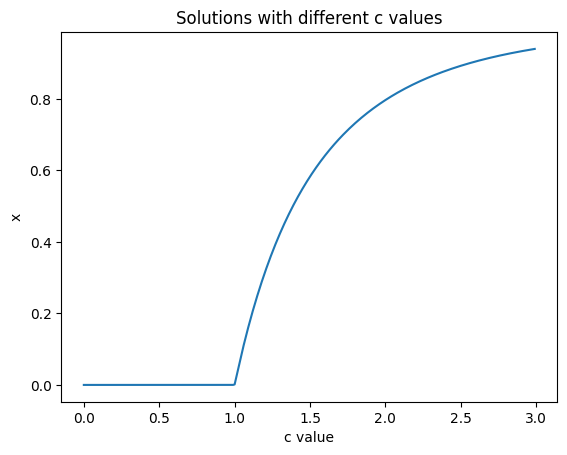

for c values < 1, the solution for x approches 0 as c goes to 0.
for c values > 1, the solution for x approaches 1 as c increases.
Moreover, x=0 is a solution for all c values, but relaxation method will converge to the nonzero value if it is far enough to the right of zero (>0.5 works for any c>1).
A huge initial value for x will result in a large initial difference, but as long as the initial delta is larger than the initial guess, it will still converge to the nonzero solution


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rel(c):
  def f(x):                #define the function inside so that c is defined
    return 1-np.exp(-c*x)  #function can more easily be changed for other problems
  epsilon = 1e-6           #set the accuracy threshold
  delta = 1                #initialize the error value
  x = 1                    #initial guess
  while delta > epsilon:
    delta_copy = delta
    x_copy = x             #make a copy of the estimate
    x = f(x)
    delta = abs(x-x_copy)
    if delta < delta_copy: #if delta is decreasing, solution will converge
      continue
    else:
      #print("did not converge")  #this line was placed to test divergent values for c
      return 0             #trivial solution
      break                #stopping condition, solution will diverge
  return x

X = np.arange(0,3,0.01)
Y = list(map(rel, X))           #map command takes the function rel and iterates it over X, generator converted to list
plt.plot(X,Y)                   #generate the plot
plt.xlabel("c value")           #label the figure
plt.ylabel("x")
plt.title("Solutions with different c values")
plt.show()                      #show plot

print("for c values < 1, the solution for x approches 0 as c goes to 0.")
print("for c values > 1, the solution for x approaches 1 as c increases.")
print("Moreover, x=0 is a solution for all c values, but relaxation method will converge to the nonzero value if it is far enough to the right of zero (>0.5 works for any c>1).")
print("A huge initial value for x will result in a large initial difference, but as long as the initial delta is larger than the initial guess, it will still converge to the nonzero solution")

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [ ]:
import numpy as np

G = 6.67430e-11      #Nm^2/kg^2
M = 5.97219e24       #kg
m = 7.34767e22       #kg
R = 3.844e8          #m
omega = 2.66166e-6   #rad/s

def f(x):            #f(x) = 0
  return (G*M/x**2) - (G*m/(R-x)**2) - omega**2*x

def derivative(y):   #numerical derivative
  h = 0.001
  return (f(y+h/2)-f(y-h/2))/h

epsilon = 1e-6           #set the accuracy threshold
delta = 1                #initialize the error value
r = 1                    #initial guess
while delta > epsilon:
  r_copy = r                       #make a copy of the estimate
  r = r - f(r)/derivative(r)       #Newton's method, as stated in the problem
  delta = abs(r-r_copy)            #new error value

print(r)
print("Using Newton's method, since only 4 sig figs are required, an error of O(h^2) = 1e-6 is more than enough.")

326040316.8969546
Using Newton's method, since only 4 sig figs are required, an error of O(h^2) = 1e-6 is more than enough.


In [ ]:
import numpy as np

G = 6.67430e-11      #Nm^2/kg^2
M = 5.97219e24       #kg
m = 7.34767e22       #kg
R = 3.844e8          #m
omega = 2.66166e-6   #rad/s

def f(x):            #f(x) = 0
  return (G*M/x**2) - (G*m/(R-x)**2) - omega**2*x

epsilon = 1e-6           #set the accuracy threshold
delta = 1                #initialize the error value
r = 1                    #initial guess
h = 0.5
while delta > epsilon:
  r_copy = r                              #make a copy of the estimate
  r = r + (f(r)*h/(f(r-h)-f(r)))          #secant method, as requested by instructor
  delta = abs(r-r_copy)                   #new error value

print(r)
print("Using secant method yields the exact same value since the epsilon value is the same.")

326040316.8969546
Using secant method yields the exact same value since the epsilon value is the same.
